In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from strategy import *

%matplotlib inline

bt version :  (0, 2, 10)


In [2]:
# 투자자산
tickers = ['TQQQ','TMF']
safe_ticker = ['BIL']

In [ ]:
data = yf.download(tickers+safe_ticker, end='2022-12-10')['Adj Close']
data = data[tickers+safe_ticker]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()
    
start_day = assets.index.min() + pd.DateOffset(months=12)
print('asset \n', assets)
print('start day : ', start_day)

NameError: name 'yf' is not defined

In [4]:
# 절대모멘텀 백테스트
def AbsoluteMomentum_BT(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Absolute Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           SelectAbsoluteMomentum(rank=rank, lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=10000.0)

In [5]:
# 절대모멘텀 TQQQ (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers[0]].to_frame(), 1, i+1, start_day, False, 1, name='{}({})'.format(tickers[0],str(i+1)))
    
am_report = bt.run(*absolutemomentum.values())

Stat                 TQQQ(1)     TQQQ(2)     TQQQ(3)     TQQQ(4)     TQQQ(5)     TQQQ(6)     TQQQ(7)     TQQQ(8)     TQQQ(9)     TQQQ(10)    TQQQ(11)    TQQQ(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         231.99%     146.23%     245.14%     953.21%     1119.44%    890.56%     908.21%     610.46%     656.16%     747.99%     333.42%     545.10%
Daily Sharpe         0.46

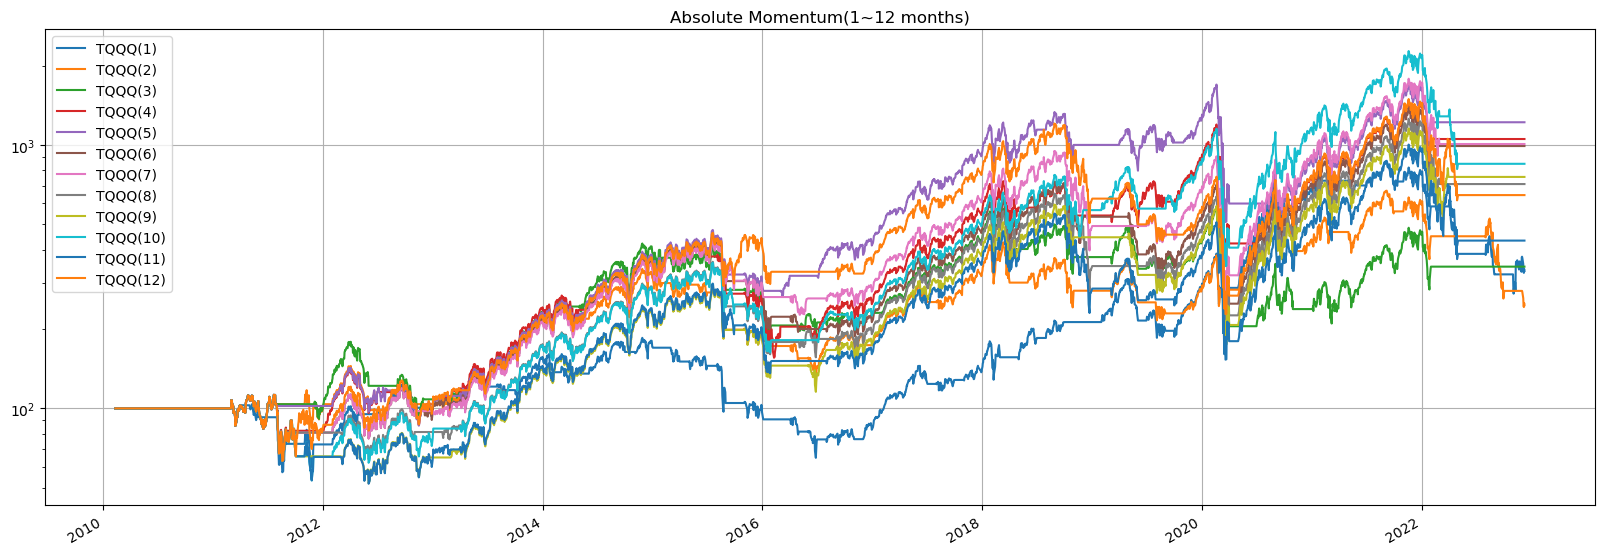

In [6]:
am_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months)')
am_report.set_date_range(start=start_day)
am_report.display()

In [7]:
# 절대모멘텀 상위 1종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers], 1, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am1_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         362.82%     161.75%     458.04%     961.25%     615.88%     308.86%     229.56%     129.52%     435.68%     290.06%     198.08%     118.69%
Daily Sharpe         0.51  

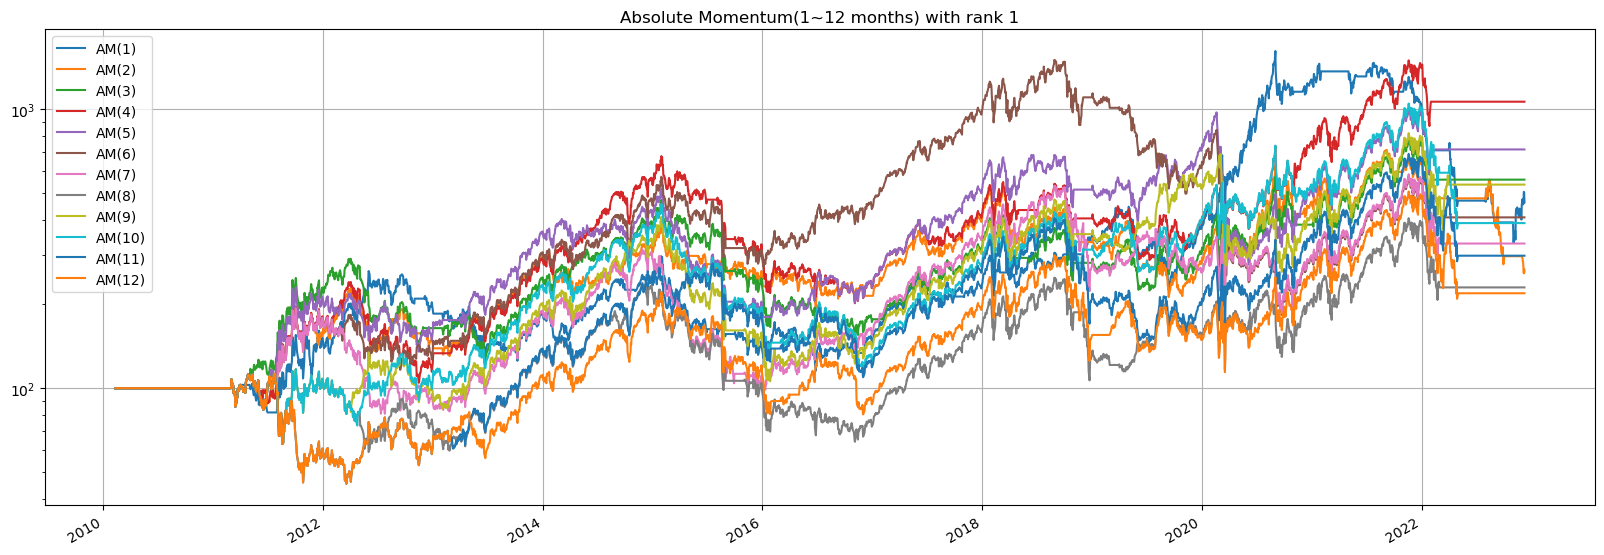

In [8]:
am1_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 1')
am1_report.set_date_range(start=start_day)
am1_report.display()
#am1_report.prices[start_day:].calc_stats().display()


In [9]:
am1_report.get_transactions('AM(4)')

price  quantity
Date       Security                     
2011-03-01 TQQQ       0.857660   11659.0
2011-06-01 TMF        8.993391    1109.0
           TQQQ       0.855696  -11659.0
2012-02-01 TMF       15.500233   -1109.0
           TQQQ       0.913480   18821.0
...                        ...       ...
2020-03-02 TMF       35.552830    1110.0
           TQQQ      21.764540   -1813.0
2020-07-01 TMF       38.365524   -1110.0
           TQQQ      25.154446    1693.0
2022-02-01 TQQQ      62.684658   -1693.0

[64 rows x 2 columns]

In [10]:
# 절대모멘텀 상위 2종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers], 2, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am2_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         200.20%     142.71%     423.27%     835.79%     1033.42%    2221.28%    1380.58%    1456.27%    867.04%     1307.26%    387.22%     339.18%
Daily Sharpe         0.43  

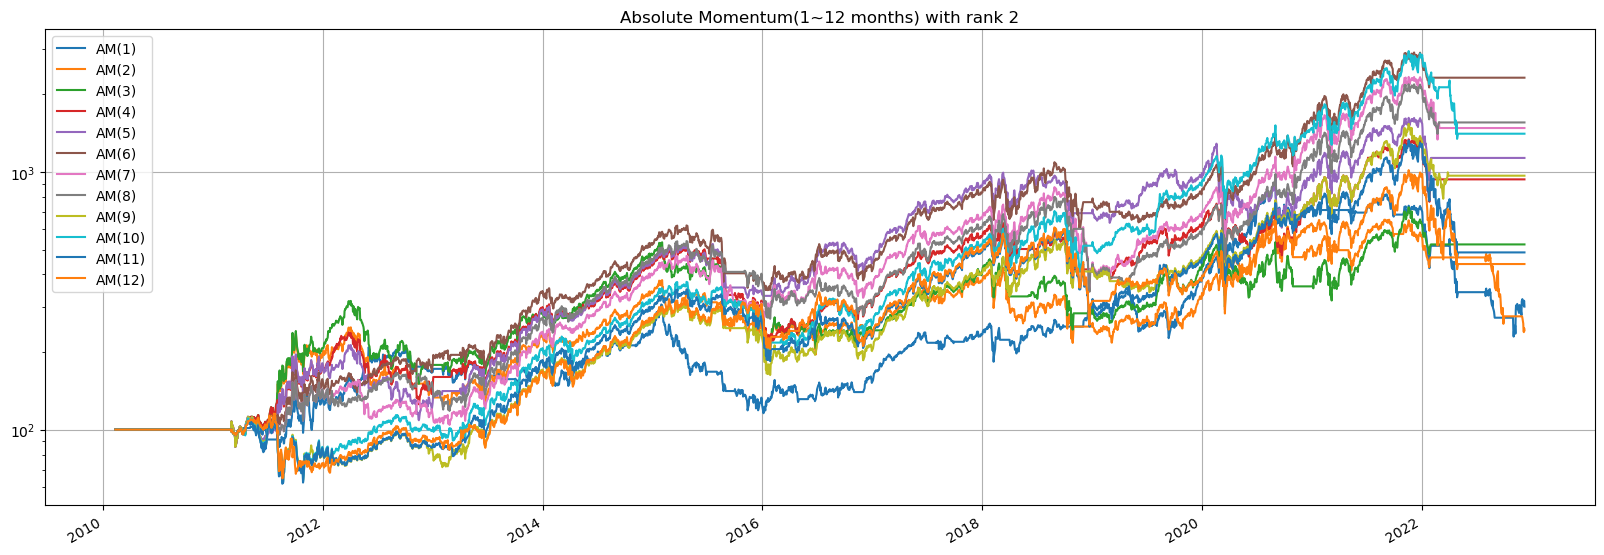

In [11]:
am2_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 2')
am2_report.set_date_range(start=start_day)
am2_report.display()
#am1_report.prices[start_day:].calc_stats().display()